In [1]:
using DynamicalSystems
using PyPlot
using NLsolve

In [2]:
Rep=10000.0 #ポアンカレ写像の反復回数
dx=0.03 #初期点をとるx座標の幅(の半分)
K=5 #初期点の個数(の半分)
dE=0.001 #平衡点のエネルギーからのズレ

0.001

In [3]:
#制限3体問題の方程式，p[1]は質量パラメータ
function r3bpproblem(u,p,t)
    mu = p[1]
    du1 = u[3]+u[2]
    du2 = u[4]-u[1]
    du3=u[4]-(1-mu)*(u[1]+mu)/((u[1]+mu)^2+u[2]^2)^(3/2)-mu*(u[1]+mu-1)/((u[1]+mu-1)^2+u[2]^2)^(3/2)
    du4=-u[3]-(1-mu)*u[2]/((u[1]+mu)^2+u[2]^2)^(3/2)-mu*u[2]/((u[1]+mu-1)^2+u[2]^2)^(3/2)
    return SVector{4}(du1, du2, du3, du4)
end

r3bpproblem (generic function with 1 method)

In [4]:
p=[0.01]
u0 = [0.5-p[1], sqrt(3)/2, -sqrt(3)/2, 0.5-p[1]]
r3bp = ContinuousDynamicalSystem(r3bpproblem,u0,p)

4-dimensional continuous dynamical system
 state:       [0.49, 0.866025, -0.866025, 0.49]
 rule f:      r3bpproblem
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [0.01]

In [5]:
E0=-3/2+1/2*p[1]-1/2*p[1]^2 #L4点のエネルギー
E=E0+dE #E0から少しズレたエネルギーレベル

-1.4940500000000003

In [6]:
#初期点たちのx成分．初期点はL4=(0.5-p[1], sqrt(3)/2, -sqrt(3)/2, 0.5-p[1])の近傍(x, sqrt(3)/2, -sqrt(3)/2, py)からとる
x=[(0.5-p[1])+dx*i/K for i in -K:K]

11-element Vector{Float64}:
 0.45999999999999996
 0.46599999999999997
 0.472
 0.478
 0.484
 0.49
 0.496
 0.502
 0.508
 0.514
 0.52

In [7]:
#(X, sqrt(3)/2, -sqrt(3)/2, P)でのエネルギーからEを引いたもの
f(P, X)=(sqrt(3)/2)^2/2+1/2*P^2-(sqrt(3)/2)^2-X*P-(1-p[1])/((X+p[1])^2+(sqrt(3)/2)^2)^(1/2)-p[1]/((X+p[1]-1)^2+(sqrt(3)/2)^2)^(1/2)-E

f (generic function with 1 method)

In [8]:
A=1/2
B(X)=-X
C(X)=(sqrt(3)/2)^2/2-(sqrt(3)/2)^2-(1-p[1])/((X+p[1])^2+(sqrt(3)/2)^2)^(1/2)-p[1]/((X+p[1]-1)^2+(sqrt(3)/2)^2)^(1/2)-E

C (generic function with 1 method)

In [9]:
#f=0となるようにPをとる．2次方程式の解で2つあるからpy0とpy1とする
py0=zeros(Float64, 2*K+1)
py1=zeros(Float64, 2*K+1)

for i in 1:2*K+1
    X=x[i]
    py0[i]=(-B(X)+sqrt(B(X)^2-4*A*C(X)))/(2*A)
    py1[i]=(-B(X)-sqrt(B(X)^2-4*A*C(X)))/(2*A)
end

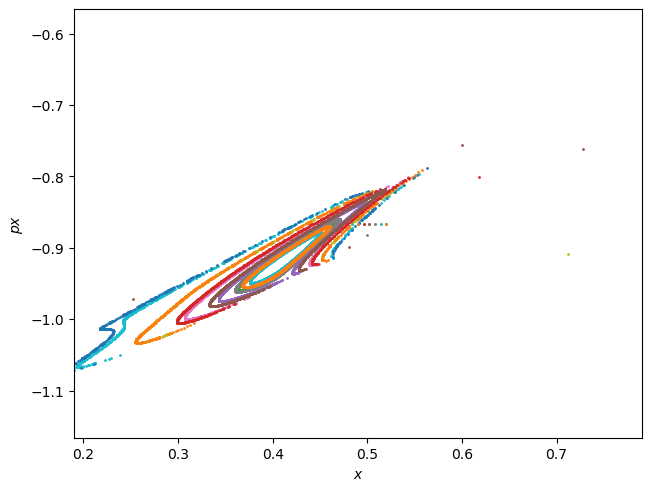

In [10]:
#L4点(0.5-p[1], sqrt(3)/2,-sqrt(3)/2, 0.5-p[1])周辺のポアンカレ写像を描く
#エネルギーをEに固定し，y=sqrt(3)/2でポアンカレ断面をとり，(x, px)を描く
plane = (2, sqrt(3)/2)
d=0.3
fig = figure()
xlim(0.5-p[1]-d, 0.5-p[1]+d)
ylim(-sqrt(3)/2-d, -sqrt(3)/2+d)

ps=[]
for i in 1:2*K+1
    u0=[x[i],sqrt(3)/2,-sqrt(3)/2,py0[i]]
    u1=[x[i],sqrt(3)/2,-sqrt(3)/2,py1[i]]
    psos0 = poincaresos(r3bp, plane, Rep; u0 = u0)
    psos1 = poincaresos(r3bp, plane, Rep; u0 = u1)
    scatter(psos0[:, 1], psos0[:, 3], s = 1)
    scatter(psos1[:, 1], psos1[:, 3], s = 1)
    #scatter(0.5-p[1], -sqrt(3)/2, s = 50.0)
end
xlabel("\$x\$"); ylabel("\$px\$")
fig.tight_layout(pad=0.3);